### #3 SVM XGBoost for Classification of Histology Images

Support vector machines (SVM) are supervised max-margin models with associated learning algorithms that analyze data for classification. 

When a computer processes an image, it perceives it as a two-dimensional array of pixels. The size of the array corresponds to the resolution of the image, for example, if the image is 200 pixels wide and 200 pixels tall, the array will have the dimensions 200 x 200 x 3. The first two dimensions represent the width and height of the image, respectively, while the third dimension represents the RGB color channels. The values in the array can range from 0 to 255, which indicates the intensity of the pixel at each point.

The SVM algorithm works by finding the hyperplane that separates the different classes in the feature space. The key idea behind SVMs is to find the hyperplane that maximizes the margin, which is the distance between the closest points of the different classes. The points that are closest to the hyperplane are called support vectors.

In [1]:
from dataset import image_dataset

In [2]:
train_dataset, val_dataset, test_dataset = image_dataset()

Loading datasets from cache.


In [53]:
first_n = [train_dataset[i] for i in range(1000)]

In [54]:
import pandas as pd 
import os 
#from skimage.transform import resize 
#from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.svm import LinearSVC

In [55]:
train_data = []
train_labels = []

for data, label in tqdm(first_n):# using val_dataset for dev
    flattened_data = data.numpy().flatten()
    train_data.append(flattened_data)
    train_labels.append(label.numpy())

train_data = np.array(train_data)
train_labels = np.array(train_labels)

100%|██████████| 1000/1000 [00:00<00:00, 50575.22it/s]


In [56]:
train_data.shape

(1000, 7500)

Two empty arrays are created to store the image data and their corresponding labels. The images need to be flattened to a 1D array. The flattened image data and its corresponding label (0 for ‘negative’ and 1 for ‘positive’) are added to the arrays. The arrays are converted to a pandas DataFrame, which is then split into input data ‘x’ (all columns except the last one) and output data ‘y’ (the last column). The resulting ‘x’ and ‘y’ data can then be used to train a machine learning model

In [57]:
print(f'Length of the train_data {len(train_data)}')
print(f'Length of the train_labels {len(train_labels)}')

Length of the train_data 1000
Length of the train_labels 1000


In [58]:
x_train,x_test,y_train,y_test=train_test_split(train_data,train_labels,test_size=0.20, 
                                               random_state=42) 

In [59]:
param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['rbf','poly']} 

svc=SVC(probability=True) 
model=GridSearchCV(svc,param_grid)

In [60]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [61]:
y_pred = model.predict(x_test)

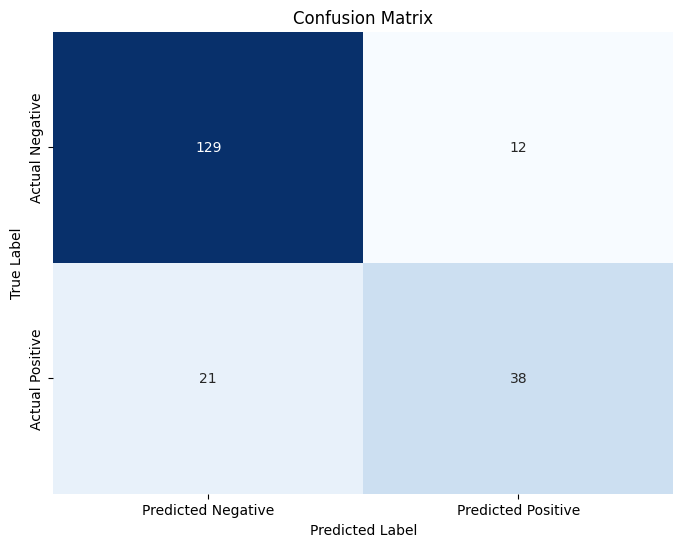

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [64]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       141
           1       0.76      0.64      0.70        59

    accuracy                           0.83       200
   macro avg       0.81      0.78      0.79       200
weighted avg       0.83      0.83      0.83       200



References:

de Matos, J.; Ataky, S.T.M.; de Souza Britto, A.; Soares de Oliveira, L.E.; Lameiras Koerich, A. Machine Learning Methods for Histopathological Image Analysis: A Review. Electronics 2021, 10, 562. https://doi.org/10.3390/electronics10050562

Zarella, M. D., Breen, D. E., Reza, A., Milutinovic, A., & Garcia, F. U. (2015). Lymph Node Metastasis Status in Breast Carcinoma Can Be Predicted via Image Analysis of Tumor Histology. Analytical and quantitative cytopathology and histopathology, 37(5), 273–285.